# Recipe to the perfect video game
__Epitech 4th year, Data Science project, 2023 promotion__
##### Authors
- Alexandre Guichet
- Matthieu Rochette
- Raphaël Hoareau
![](https://upload.wikimedia.org/wikipedia/commons/0/01/Video-games-1557358.jpg)

## Context

### The question
Let's imagine we were hired by a video games development company, which is looking to make a new  video game that they know will be popular among the gaming community.

As such, they come to us with the question:

__*What is the recipe to make people love your video game ?*__

### What is love ?
*(Oh, baby don't hurt me)*

First, we need to define how we measure the love of people for your game. We will use ratings from the professional critics (Metacritic) and user ratings (RAWG), as a measure of how much a game is appreciated by the players. We will consider the rating to be positively correlated to the love of people for a game (high rating = high love, and vice-versa).

## Data collection

We will use [this](https://www.kaggle.com/jummyegg/rawg-game-dataset) dataset, which contains data from the website [RAWG](https://rawg.io/) for about 470 000 video games, including ratings from RAWG (user ratings) and [Metacritic](https://www.metacritic.com/) (professional/reknowned critics ratings, [see here](https://www.metacritic.com/about-metascores)).

In [1]:
import pandas as pd
import datetime as dt
import plotly.express as exp
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

pd.options.plotting.backend = "plotly"

dataset = pd.read_csv('game_info.csv')

KernelInterrupted: Execution interrupted by the Jupyter kernel.

Some columns contain cases with multiple values separated by `||` as we can see here under, we will likely need a way to get unique values properly from those columns.

In [2]:
dataset["genres"].unique()

array(['Adventure||Puzzle', 'Simulation||Indie', 'Adventure||Arcade', ...,
       'Strategy||Simulation||Sports||Arcade||Casual||Indie',
       'Shooter||Adventure||Racing',
       'Action||Racing||Arcade||Indie||Puzzle'], dtype=object)

So, here is a function that returns the list of unique data from a given column:

In [3]:
# get all uniques in a column with multiple values per case
def get_uniques_from_column(column, sep: str = '||', remove_under: int = None) -> list:
    """
    Get unique values from columns containing multiple values in the same raw.

    column: (iterable) container for your values
    sep: (string) separator for the content of each element in the column
    remove_under: (int) prevent from returning a unique value if its occurs less than remove_under times in column.
    
    Returns a list containing once each unique value contained in the column.
    """
    uniques = []
    for elem in column:
        if sep in str(elem):
            parsed = elem.split(sep)
        else:
            parsed = [elem]
        uniques.extend(parsed)

    set_uniques = list(set(uniques))  # converting to a set automatically removes duplicates from the parsed values

    if remove_under is not None:
        counts = {i:uniques.count(i) for i in set_uniques}
        for key, val in counts.items():
            if val < remove_under:
                set_uniques.remove(key)

    return set_uniques

#get_uniques_from_column(dataset["platforms"]) # giving the Series.unique() reduces the number of values to process, but should not be used with argument remove_under

We can see a `nan` at the top of the list, this will have to be removed by hand when calling the function afterwards.

## Data cleaning

Here, we will remove useless data from our dataset and correct incomplete/missing data or formatting errors.
First, we will remove useless columns:

In [4]:
# First, remove unwanted/useless columns
dataset.drop(
    [
        "id",  # unique id on RAWG
        "slug",  # unique slug on RAWG
        "website",  # official website of the game
        "tba",  # to be announced
        "added_status_yet",
        "added_status_owned",
        "added_status_beaten",
        "added_status_toplay",
        "added_status_dropped",
        "added_status_playing"],
    inplace=True,
    axis=1
)
# Rename oddly named or unclear column names
dataset.rename(
    {
        "esrb_rating": "esrb_category",  # could be confused with apprecition rating
    },
    inplace=True,
    axis=1
)

dataset

,name,metacritic,released,updated,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,platforms,developers,genres,publishers,esrb_category
0,D/Generation HD,NaN,2015-10-23,2019-09-17T11:58:57,0.0,0,1,80,2,292,0,4,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+
1,G Prime Into The Rain,NaN,2016-01-06,2019-11-06T23:04:19,0.0,0,0,26,3,389,0,3,macOS||PC||Xbox One,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone
2,Land Sliders,NaN,2015-09-24,2019-10-22T13:56:16,0.0,0,0,0,2,83,0,2,iOS,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+
3,Pixel Gear,NaN,2016-10-20,2019-08-28T22:16:02,0.0,0,0,0,0,455,0,0,PC||PlayStation 4,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen
4,Gods and Idols,NaN,2016-12-12,2019-09-17T13:37:13,0.0,1,1,0,5,262,0,5,PC,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474412,Holy or Dead,NaN,2017-05-17,2019-01-09T12:41:06,0.0,0,0,0,0,52,0,0,PC,Ralidon,NaN,NaN,NaN
474413,Airstrike HD Demo,NaN,2016-03-04,2019-01-09T12:41:06,0.0,0,0,0,0,202,0,0,PC,Fifth Dimension Company,Action,NaN,NaN
474414,Urania's Mirror,NaN,2016-04-25,2019-01-09T12:41:06,0.0,0,0,0,0,51,0,0,PC,sneakthief,Adventure,NaN,NaN
474415,Simucities,NaN,2017-05-26,2019-01-09T12:41:06,0.0,0,0,0,0,84,0,0,PC,keypixels,NaN,NaN,NaN


We will now remove useless rows.  
First, the games that are not released yet are of no interest to us, as nobody could have played them.

In [5]:
# Formatting date columns to manipulate them more easily
dataset["released"] = pd.to_datetime(dataset["released"], format="%Y-%m-%d")
dataset["updated"] = pd.to_datetime(dataset["updated"], format="%Y-%m-%dT%H:%M:%S")


prev_len = len(dataset)
dataset = dataset[(dataset["released"] <= dt.datetime.today())]  # removing games released after today
print(f"Removed {prev_len - len(dataset)} games that are not released yet.")

Removed 24328 games that are not released yet.


Next to be removed are the games with neither metacritic ratings nor RAWG ratings, because we cannot measure any level of appreciation without those ratings. But before removing them, we will have to ensure there are no inconsistencies (i.e. a game has a ratings_count of 0 but a rating different from 0).

In [6]:
# check for inconsistencies
erroneous_ratings = dataset[(dataset["ratings_count"] == 0) & ((dataset["rating"] != 0) | (dataset["rating_top"] != 0))]
print(f"There are {len(erroneous_ratings)} games with inconsistencies in their RAWG ratings.")

# removing games without any critics
prev_len = len(dataset)
dataset = dataset[(dataset["ratings_count"] == 0) & dataset["metacritic"].isnull() & dataset["reviews_count"] <= 0]  # removing games without rating
print(f"Removed {prev_len - len(dataset)} games that have no ratings.")
dataset

There are 0 games with inconsistencies in their RAWG ratings.
Removed 628 games that have no ratings.


,name,metacritic,released,updated,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,platforms,developers,genres,publishers,esrb_category
0,D/Generation HD,NaN,2015-10-23,2019-09-17 11:58:57,0.0,0,1,80,2,292,0,4,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+
1,G Prime Into The Rain,NaN,2016-01-06,2019-11-06 23:04:19,0.0,0,0,26,3,389,0,3,macOS||PC||Xbox One,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone
2,Land Sliders,NaN,2015-09-24,2019-10-22 13:56:16,0.0,0,0,0,2,83,0,2,iOS,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+
3,Pixel Gear,NaN,2016-10-20,2019-08-28 22:16:02,0.0,0,0,0,0,455,0,0,PC||PlayStation 4,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen
4,Gods and Idols,NaN,2016-12-12,2019-09-17 13:37:13,0.0,1,1,0,5,262,0,5,PC,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474412,Holy or Dead,NaN,2017-05-17,2019-01-09 12:41:06,0.0,0,0,0,0,52,0,0,PC,Ralidon,NaN,NaN,NaN
474413,Airstrike HD Demo,NaN,2016-03-04,2019-01-09 12:41:06,0.0,0,0,0,0,202,0,0,PC,Fifth Dimension Company,Action,NaN,NaN
474414,Urania's Mirror,NaN,2016-04-25,2019-01-09 12:41:06,0.0,0,0,0,0,51,0,0,PC,sneakthief,Adventure,NaN,NaN
474415,Simucities,NaN,2017-05-26,2019-01-09 12:41:06,0.0,0,0,0,0,84,0,0,PC,keypixels,NaN,NaN,NaN


Finally, we will check if there are any more columns to convert, null values to fill/remove etc.

In [7]:
# Check if we need to convert columns
dataset.dtypes

name                          object
metacritic                   float64
released              datetime64[ns]
updated               datetime64[ns]
rating                       float64
rating_top                     int64
playtime                       int64
achievements_count             int64
ratings_count                  int64
suggestions_count              int64
game_series_count              int64
reviews_count                  int64
platforms                     object
developers                    object
genres                        object
publishers                    object
esrb_category                 object
dtype: object

We can see that all columns that contain quantitative values have a numerical dtype, which means they are correctly parsed by pandas (in case of errors, pandas displays the columns as "object" dtype).

In [8]:
dataset.isnull().sum()

name                       2
metacritic            444742
released                   0
updated                    0
rating                     0
rating_top                 0
playtime                   0
achievements_count         0
ratings_count              0
suggestions_count          0
game_series_count          0
reviews_count              0
platforms               3413
developers              5011
genres                100435
publishers            319028
esrb_category         396176
dtype: int64

There are a lot of null values in the `metacritic` column, but seeing as the values for Metacritic ratings go from 0 to 100, it would bias the data to replace null values with zeros. We also cannot remove them, because we would lose too much data.

However, the column `rating` has zeros to indicate an absence of rating instead of NaN. As NaN values are automatically ignored when plotting, it would be to our advantage to transform those zeros in NaN values:

In [9]:
import numpy as np
dataset["rating"] = dataset["rating"].replace(0, np.nan)

There are also empty names. Seeing as the name is not a crucial piece of data in this study, we can just put a placeholder value.

In [10]:
def fill_empty_name(name):
    if str(name) == "nan":
        name = "Unknown game " + str(fill_empty_name.counter)
        fill_empty_name.counter += 1
    return name  
fill_empty_name.counter = 0  # static variable to give each game a unique name

# fill empty names
dataset["name"] = dataset["name"].apply(fill_empty_name)
print(f"There are {dataset['name'].isnull().sum()} empty names left.")

There are 0 empty names left.


## Explorative Data Analysis (EDA)
Now that our data is clean, let's analyse it !

### Correlation matrix
First of all, we can use a correlation matrix to try to understand how each column correlate with the others.

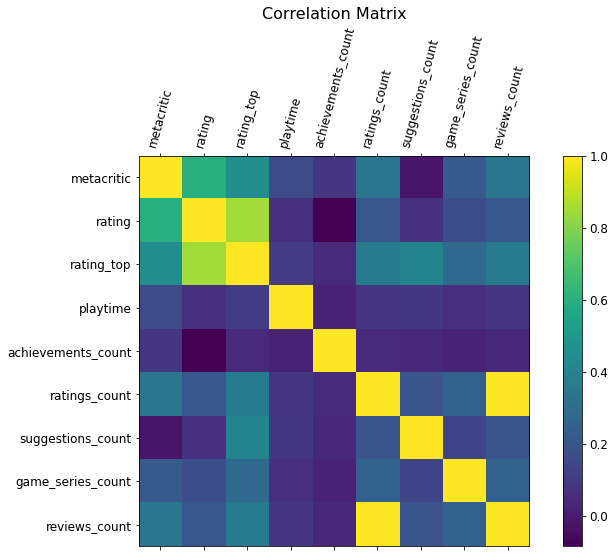

In [11]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 7))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=12, rotation=75)
plt.yticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16);

We can see that `playtime` and `achievements_count` have almost no correlation with any other columns, including the ratings. We can therefore consider them to be inconsequential on the appreciation level of a game.

### Determine consistency between Metacritic and RAWG ratings
Let's see how consistent metacritic ratings and RAWG ratings are (for games that have both, those with a NaN value in either column are automatically ignored in the plot): 

In [12]:
fig = exp.scatter(x="rating", y="metacritic", data_frame=dataset, trendline="ols")  # ols = Ordinary Least Squares
fig.data = [t for t in fig.data if t.mode == "lines"]
fig

We can see with the trendline that there is some consistence between Metacritic and RAWG ratings, although not perfect (R² of .359).  

In the high ratings, RAWG users seem to be more lenient than Metacritic ones (4.5/5 = 0.9 for RAWG, when Metacritic is at 85%), but for lower ratings it seems to be reversed (3/5 = 0.6 for RAWG, against 70% for Metacritic). These results might be linked to the rating system of RAWG, which offers less precision to the user than Metacritic. Therefore, little differences between both ratings should not be taken too seriously.

For low ratings however (under 3/5), it's a whole different story. The lowest rating (1/5) on RAWG corresponds to around 50/100 on Metacritic. Therefore, we should consider a rating of 50 on Metacritic to be equivalent to a bad rating.

To sum up:
| Metacritic | <-> | RAWG |
|:--|-|--:|
| < 50 | <-> | < 1 |
| 50 to 70 | <-> | 1 to 3 |
| > 70 | <-> | > 3 |

### Compare non-quantitative columns with RAWG and Metacritic ratings
Now, we will compare each columns with the ratings from RAWG and from Metacritic, and try to find correlations.

#### Release dates
##### Plots

In [13]:
dataset["release_year"] = pd.DatetimeIndex(dataset['released']).year  # We will group data by release year, in order to make a more "large-scale" analysis
by_release = dataset[["release_year", "metacritic", "rating"]].groupby("release_year").describe()

First we will see how many games were rated per year.

In [14]:
by_release["metacritic"].plot.line(y=["count"], title="Count of Metacritic ratings by release year")

In [15]:
by_release["rating"].plot.line(y=["count"], title="Count of RAWG ratings by release year")

As we can see, there are some years where not enough ratings were given to represent all the games of that year. We will reduce the dataset to years with at least 10 ratings (= 10 games rated), in order to have data that is not biased by a single game.

In [16]:
prev_len = len(by_release["rating"])
by_release = by_release.drop(by_release[(by_release['rating']['count'] <= 10)].index)
#by_release["rating"] = by_release["rating"][(by_release["rating"]["count"] >= 10)]
print(f"Removed {prev_len - len(by_release['rating'])} years that do not have enough games rated.")

prev_len = len(by_release["metacritic"])
by_release = by_release.drop(by_release[(by_release['metacritic']['count'] <= 10)].index)
#by_release["metacritic"] = by_release["metacritic"][(by_release["metacritic"]["count"] >= 10)]
print(f"Removed {prev_len - len(by_release['metacritic'])} years that do not have enough games rated.")

Removed 13 years that do not have enough games rated.
Removed 15 years that do not have enough games rated.


In [17]:
by_release["metacritic"].plot.scatter(x=by_release.index, y=["mean", "min", "max"], title="Mean, Min and Max Metacritic ratings by release year", trendline="lowess")

In [18]:
by_release["rating"].plot.scatter(x=by_release.index, y=["mean", "min", "max"], title="Mean, Min and Max RAWG ratings by release year", trendline="lowess")

#### Analysis

Firstly, we will note that Metacritic ratings from before 1999 and RAWG ratings from before 2010 (date of foundation of RAWG not found, but safe to assume it did not exist before then) were made long after the publishing of the game. As such, there may be [a Rosy Retrospection bias](https://en.wikipedia.org/wiki/Rosy_retrospection) in the ratings for those games. However, determining if this bias is present this would require more in-depth analysis that we will not do here. Therefore, we cannot guarantee the accuracy of our analysis for dates prior to those afore-mentioned.
    
We can see that the mean rating per release year follows a normal distribution when the sample size grows. This means, the more games have been rated, the more the mean of those ratings is average. For 

If we are to believe this data though, it would seem that the more "retro" the games, the better the ratings.

#### Genres
We will try to determine which genres are the most popular in the gaming community.

In [19]:
genres = get_uniques_from_column(dataset["genres"].unique())
genres.remove(np.nan)  # removing NaN from game genres
dataset_genres = dataset.copy()

In [20]:
#dataset_genres["genres"] = dataset_genres["genres"].astype(str).apply(lambda x: x.split('||')) # spliting genres string to make a list of genre for each game
for genre in genres:
    dataset_genres[genre] = False
    dataset_genres[genre] = dataset_genres["genres"].str.contains(r"(^|\|\|)"  + genre + r"($|\|\|)", na=False)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



KeyboardInterrupt: 

In [ ]:
def get_describe_by(mean_col, by_col, dataframe):
    def wrapped(elem):
        tmp = dataframe.where(dataframe[elem[by_col]] == True)[mean_col].describe()
        for col in tmp.index:
           elem[mean_col + '-' + col] = tmp[col]
        return elem
    return wrapped

In [ ]:
rating_genres = pd.DataFrame(data={'genres': genres})

rating_genres = rating_genres.apply(get_describe_by("metacritic", "genres", dataset_genres), axis=1)
rating_genres.set_index('genres', inplace=True)
#rating_genres.sort_values("metacritic", inplace=True)
#rating_genres["metacritic"].plot.bar()
rating_genres.sort_values("metacritic-count", inplace=True)
rating_genres.plot.bar(x=rating_genres.index, y=["metacritic-count"])

KeyboardInterrupt: 

In [ ]:
rating_genres.sort_values("metacritic-mean", inplace=True)
rating_genres.plot.scatter(x=rating_genres.index, y=["metacritic-min", "metacritic-mean", "metacritic-max"])

#### Platforms
Now, same process as the genres but with the platforms.

In [ ]:
print(len(dataset["platforms"]), len(dataset["platforms"].unique()))

449461 5038


In [ ]:
pd.options.mode.chained_assignment = None  # disabling false positive warning
#platforms = get_uniques_from_column(dataset["platforms"].unique())
platforms = get_uniques_from_column(dataset["platforms"], remove_under=5)
platforms.remove(np.nan)

platforms_df = dataset[["rating", "metacritic", "platforms"]]

for platform in platforms:
    platforms_df[platform] = False
    platforms_df[platform] = platforms_df["platforms"].str.contains(r"(^|\|\|)"  + platform + r"($|\|\|)", na=False)

platforms_df.drop("platforms", axis=1, inplace=True)
pd.options.mode.chained_assignment = 'warn'  # re-enabling warning

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
platforms_new_df = pd.DataFrame({"platform": platforms})
platforms_rating = platforms_new_df.apply(get_describe_by("rating", "platform", platforms_df), axis=1)
platforms_metacritic = platforms_new_df.apply(get_describe_by("metacritic", "platform", platforms_df), axis=1)
platforms_rating.set_index("platform", inplace=True)
platforms_metacritic.set_index("platform", inplace=True)

In [ ]:
platforms_metacritic = platforms_metacritic.drop(platforms_metacritic[(platforms_metacritic["metacritic-count"] < 5)].index)
platforms_metacritic.sort_values("metacritic-count", inplace=True)
platforms_metacritic.plot.bar(x=platforms_metacritic.index, y="metacritic-count")

In [ ]:
platforms_metacritic.sort_values("metacritic-mean", inplace=True)
platforms_metacritic.plot.scatter(x=platforms_metacritic.index, y=["metacritic-min", "metacritic-mean", "metacritic-max"])

In [ ]:
platforms_rating = platforms_rating.drop(platforms_rating[(platforms_rating["rating-count"] < 5)].index)
platforms_rating.sort_values("rating-count", inplace=True)
platforms_rating.plot.bar(x=platforms_rating.index, y="rating-count")

In [ ]:
platforms_rating.sort_values("rating-mean", inplace=True)
platforms_rating.plot.scatter(x=platforms_rating.index, y=["rating-min", "rating-mean", "rating-max"])

#### Publishers
This part will not be used in the published version of the notebook, it remains here for the evaluation only.

In [ ]:
#publishers = get_uniques_from_column(dataset["publishers"])
#publishers
#publishers.remove(np.nan)  # removing NaN from game publishers
#dataset_publishers = dataset.copy()

#for publisher in publishers:
#    dataset_publishers[publisher] = False
#    dataset_publishers[publisher] = dataset_publishers["publishers"].str.contains(r"(^|\|\|)"  + publisher + r"($|\|\|)", na=False)

#rating_publishers = pd.DataFrame(data={'publishers': publishers})

#rating_publishers = rating_publishers.apply(get_describe_by("metacritic", "publishers", dataset_publishers), axis=1)
#rating_publishers.set_index('publishers', inplace=True)
#rating_publishers.sort_values("metacritic", inplace=True)
#rating_publishers["metacritic"].plot.bar()
#rating_publishers.sort_values("metacritic-count", inplace=True)
#rating_publishers.plot.scatter(x=rating_publishers.index, y=["metacritic-count"])

#rating_publishers.sort_values("metacritic-mean", inplace=True)
#rating_publishers.plot.scatter(x=rating_publishers.index, y=["metacritic-min", "metacritic-mean", "metacritic-max"])

In [ ]:
#rating_publishers.sort_values("metacritic-mean", inplace=True)
#rating_publishers.plot.scatter(x=rating_publishers.index, y=["metacritic-min", "metacritic-mean", "metacritic-max"])

In [ ]:
#dataset_genres = dataset.copy()

#dataset_genres["genres"] = dataset_genres["genres"].astype(str).apply(lambda x: x.split('||'))

In [ ]:

#def lol(game):
#    new_dataset = pd.DataFrame()
#    tmp = game.copy()
#    for genre in game["genres"]:
#        tmp["genres"] = genre
#        new_dataset.append(other=tmp)
#    return new_dataset

#new_dataset = dataset_genres.apply(lambda x: lol(x), axis=1)

#new_dataset.head()


#### ESRB Category

In [ ]:
categories = get_uniques_from_column(dataset["esrb_category"].unique())
categories.remove(np.nan)  # removing NaN from esrb category
dataset_categories = dataset.copy()

dataset_categories = dataset_categories.drop(dataset_categories[(dataset_categories['metacritic']['count'] <= 10)].index)

for category in categories:
    dataset_categories[category] = False
    dataset_categories[category] = dataset_categories["esrb_category"].str.contains(r"(^|\|\|)"  + category + r"($|\|\|)", na=False)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
rating_categories = pd.DataFrame(data={'esrb_category': categories})

rating_categories = rating_categories.apply(get_describe_by("metacritic", "esrb_category", dataset_categories), axis=1)
rating_categories.set_index('esrb_category', inplace=True)
#rating_genres.sort_values("metacritic", inplace=True)
#rating_genres["metacritic"].plot.bar()
rating_categories.sort_values("metacritic-count", inplace=True)
rating_categories.plot.bar(x=rating_categories.index, y=["metacritic-count"])

In [ ]:
rating_genres = pd.DataFrame(data={'genres': genres})

rating_genres = rating_genres.apply(get_describe_by("metacritic", "genres", dataset_genres), axis=1)
rating_genres.set_index('genres', inplace=True)
#rating_genres.sort_values("metacritic", inplace=True)
#rating_genres["metacritic"].plot.bar()
rating_genres.sort_values("metacritic-count", inplace=True)
rating_genres.plot.bar(x=rating_genres.index, y=["metacritic-count"])

In [ ]:
platforms_new_df = pd.DataFrame({"platform": platforms})
platforms_rating = platforms_new_df.apply(get_describe_by("rating", "platform", platforms_df), axis=1)
platforms_metacritic = platforms_new_df.apply(get_describe_by("metacritic", "platform", platforms_df), axis=1)
platforms_rating.set_index("platform", inplace=True)
platforms_metacritic.set_index("platform", inplace=True)

platforms_metacritic = platforms_metacritic.drop(platforms_metacritic[(platforms_metacritic["metacritic-count"] < 5)].index)
platforms_metacritic.sort_values("metacritic-count", inplace=True)
platforms_metacritic.plot.bar(x=platforms_metacritic.index, y="metacritic-count")

According to the correlation matrix, there is no particular correlation between rating and some data like playtime, achievements count or game series count. There is no reason to compare them. The suggestions count and reviews count's data are useless to compare given that they are increments only after the game's launch and doesn't influence the game development. About the data like publishers or developpers, they are too varied to be used for comparaison.

## Conclusion

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a9ec7ae-4a3f-4454-8a31-765f030573ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>